**Hierarchial Clustering**

In [0]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
#from matplotlib import pyplot as plt


In [2]:
from google.colab import files
uploaded = files.upload()
#import io
#df2 = pd.read_csv(io.BytesIO(uploaded['Filename.csv']))
import io
# making data frame from csv file
#data = pd.read_csv("nba.csv", index_col ="Name")
bc_data=pd.read_csv(io.BytesIO(uploaded['nci_60.txt']), sep='\t')

Saving nci_60.txt to nci_60.txt


In [4]:
df=bc_data
print(df.head(10))
print(df.shape)

     gene     786-0      A498      A549  ...      U251  UACC-257   UACC-62     UO-31
0    A1BG -1.025477 -0.925477  0.274523  ...  0.314523  1.774523  2.104523 -0.665477
1     A2M -1.409323 -1.409323 -1.409323  ... -1.369323  5.630677  3.280677 -1.399323
2   A2ML1 -1.696062 -1.686062 -1.686062  ... -1.696062 -1.686062 -1.586062 -1.696062
3  A4GALT  1.978677  1.588677  0.908677  ... -0.131323 -2.241323 -1.581323  1.368677
4    AAAS  0.878385  0.178385  1.658385  ...  0.238385  0.778385  0.558385  0.508385
5    AACS -0.354923 -0.184923 -0.074923  ... -0.254923 -1.064923 -0.184923  0.385077
6   AADAC -0.809323 -0.389323  0.880677  ... -0.809323 -0.809323 -0.809323 -0.809323
7   AAED1  1.419631  1.779631  0.809631  ...  0.539631 -0.080369  0.129631  0.859631
8   AAGAB  0.369015  0.249015  0.649015  ...  0.289015  0.079015 -0.680985 -0.240985
9    AAMP -0.128523 -0.198523  0.381477  ... -0.058523  0.341477  0.271477 -0.498523

[10 rows x 61 columns]
(9994, 61)


In [5]:
Get a list of the columns in the df with
list(df.columns.values)


['gene',
 '786-0',
 'A498',
 'A549',
 'ACHN',
 'BT-549',
 'CAKI-1',
 'CCRF-CEM',
 'COLO205',
 'DU-145',
 'EKVX',
 'HCC-2998',
 'HCT-116',
 'HCT-15',
 'HL-60',
 'HOP-62',
 'HOP-92',
 'HS-578T',
 'HT29',
 'IGR-OV1',
 'K-562',
 'KM12',
 'LOX-IMVI',
 'M14',
 'MALME-3M',
 'MCF7',
 'MDA-MB-231',
 'MDA-MB-435',
 'MDA-MB-468',
 'MOLT-4',
 'NCI-ADR-RES',
 'NCI-H226',
 'NCI-H23',
 'NCI-H322M',
 'NCI-H460',
 'NCI-H522',
 'OVCAR-3',
 'OVCAR-4',
 'OVCAR-5',
 'OVCAR-8',
 'PC-3',
 'RPMI-8226',
 'RXF-393',
 'SF-268',
 'SF-295',
 'SF-539',
 'SK-MEL-2',
 'SK-MEL-28',
 'SK-MEL-5',
 'SK-OV-3',
 'SN12C',
 'SNB-19',
 'SNB-75',
 'SR',
 'SW-620',
 'T-47D',
 'TK-10',
 'U251',
 'UACC-257',
 'UACC-62',
 'UO-31']

How many genes and cell lines does the NCI-60 data have?

In [7]:
#Process the data for clustering. Change the index from the numerical index (default when you load a pandas df) to the first column (gene names). 
df_genes = df.set_index('gene')
print(df_genes.head(10))


           786-0      A498      A549  ...  UACC-257   UACC-62     UO-31
gene                                  ...                              
A1BG   -1.025477 -0.925477  0.274523  ...  1.774523  2.104523 -0.665477
A2M    -1.409323 -1.409323 -1.409323  ...  5.630677  3.280677 -1.399323
A2ML1  -1.696062 -1.686062 -1.686062  ... -1.686062 -1.586062 -1.696062
A4GALT  1.978677  1.588677  0.908677  ... -2.241323 -1.581323  1.368677
AAAS    0.878385  0.178385  1.658385  ...  0.778385  0.558385  0.508385
AACS   -0.354923 -0.184923 -0.074923  ... -1.064923 -0.184923  0.385077
AADAC  -0.809323 -0.389323  0.880677  ... -0.809323 -0.809323 -0.809323
AAED1   1.419631  1.779631  0.809631  ... -0.080369  0.129631  0.859631
AAGAB   0.369015  0.249015  0.649015  ...  0.079015 -0.680985 -0.240985
AAMP   -0.128523 -0.198523  0.381477  ...  0.341477  0.271477 -0.498523

[10 rows x 60 columns]


In [8]:
#Get List of Cell lines
cells = list(df_genes.columns.values) 
print(cells)

['786-0', 'A498', 'A549', 'ACHN', 'BT-549', 'CAKI-1', 'CCRF-CEM', 'COLO205', 'DU-145', 'EKVX', 'HCC-2998', 'HCT-116', 'HCT-15', 'HL-60', 'HOP-62', 'HOP-92', 'HS-578T', 'HT29', 'IGR-OV1', 'K-562', 'KM12', 'LOX-IMVI', 'M14', 'MALME-3M', 'MCF7', 'MDA-MB-231', 'MDA-MB-435', 'MDA-MB-468', 'MOLT-4', 'NCI-ADR-RES', 'NCI-H226', 'NCI-H23', 'NCI-H322M', 'NCI-H460', 'NCI-H522', 'OVCAR-3', 'OVCAR-4', 'OVCAR-5', 'OVCAR-8', 'PC-3', 'RPMI-8226', 'RXF-393', 'SF-268', 'SF-295', 'SF-539', 'SK-MEL-2', 'SK-MEL-28', 'SK-MEL-5', 'SK-OV-3', 'SN12C', 'SNB-19', 'SNB-75', 'SR', 'SW-620', 'T-47D', 'TK-10', 'U251', 'UACC-257', 'UACC-62', 'UO-31']


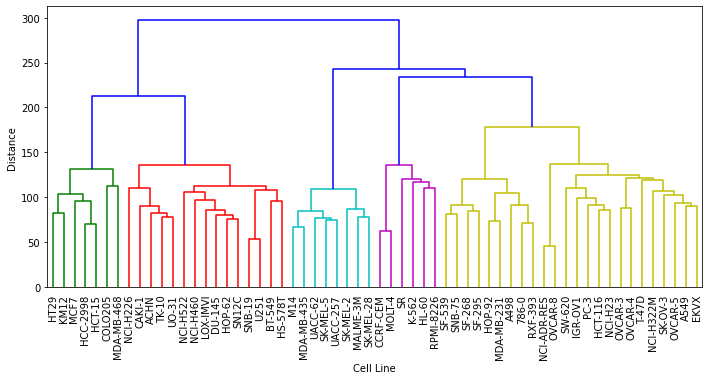

In [25]:
#Create a function that contains everything needed for performing hierarchical clustering. 
#Calling dendrogrammer. Once it is written, call the function like so:
#dendrogrammer(df_genes, cells)
# display dendrogram
# give it the labels for the data you want as leaves
def dendrogrammer(df_genes, leaf_labels):
  #get just the numerical data from the dataframe in a numpy array
  D = df_genes.values
#Plus, scipy’s clustering algorithm clusters the rows, not the columns. If we want to cluster the cell lines, we’ll need to transpose the data.
# Check to see if we need to transpose D
# Length of leaf labels should be same as the number of rows in D
  if len(leaf_labels) != len(D):
    D = np.transpose(D)
#Perform hierarchical clustering. You can specify different linkage methods and distance metrics.
  Z = linkage(D, method='ward', metric='euclidean')
#dendrogram(Z, leaf_rotation=90., leaf_font_size=10.,
#labels=leaf_labels)

#Plot the dendrogram
  
  plt.figure(figsize=(10, 6))
  ax = plt.subplot()
  plt.subplots_adjust(left=0.07, bottom=0.3, right=0.98, top=0.95,
  wspace=0, hspace=0)
  plt.xlabel('Cell Line')
  plt.ylabel('Distance')
  dendrogram(Z, leaf_rotation=90., leaf_font_size=10.,labels=leaf_labels)
  plt.savefig('dendrogram_nci60.png')

dendrogrammer(df_genes, cells)




What does this tell us? Who knows?

We can get a rough idea of which cell lines have similar global gene expression profiles. For instance, we see many of the
ovarian cancer cell lines in the yellow cluster (OVCAR-3, OVCAR4, OVCAR8, SKO-OV-3) and some melanomas in the
blue cluster (SK-MEL-28, MALME3M, SK-MEL-2, M14, MDA-MD-435).

If we knew something about the mutational background, we could start looking for other rational explanations for the
clusters. e.g., do any of the clusters share a driving mutation in RAS? BRAF? EGFR?

**K-Means Clustering**

We will do this just because we want to visualize the
data. This is a dataset with >9000 dimensions. We’ll use PCA to project into three dimensions.

In [0]:
# Perform PCA on the data, for dimensionality reduction
from sklearn.decomposition import PCA
def PCAer(df):
 D = df_genes.values
 D = np.transpose(D)
 pca = PCA()
 pca.fit(D)
 projected = pca.fit_transform(D)
 return projected


In [0]:
from sklearn.cluster import KMeans
# k-means clustering
# user supplies k
def kmeanser(df_genes,k):
# we'll perform a PCA just so we can plot the clustering results
  Dpc = PCAer(df_genes)
# Now kmeans
  kmeans = KMeans(n_clusters=k) # initialize
  kmeans = kmeans.fit(Dpc) # compute K-means clustering
  labels = kmeans.predict(Dpc) # get cluster labels for data points
  C = kmeans.cluster_centers_ # get cluster centers
  out = [Dpc, labels, C]
  return out
[proj, labels, centroids] = kmeanser(df_genes,6)



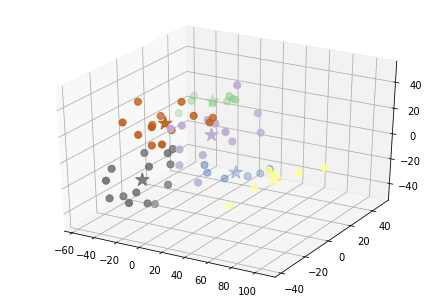

In [38]:
#Plot the 
from mpl_toolkits.mplot3d import Axes3D
# plot the clustClusters
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1 = Axes3D(fig1)
# plot the projected data with assigned clusters
ax1.scatter(proj[:, 0], proj[:, 1], proj[:, 2], c=labels, s=50, cmap='Accent')
# plot the centroids
ax1.scatter(centroids[:,0], centroids[:,1], centroids[:,2], c=range(6), s=200,
marker='*', cmap='Accent')
fig1.show()


https://cnls.lanl.gov/external/qbio2018/Slides/Cluster_Lab_June18/clustering_lab.pdf